In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def plot_heatmap(Pq2_path, U):
    file = h5py.File(Pq2_path)
    data = np.array(file["Pmn2_avg"])
    U_index = list(file["U"]).index(U)

    plt.imshow(np.transpose(np.log10(abs(data[U_index,::-1,::-1]))), vmin=-5, vmax=0, origin='lower')
    plt.colorbar()
    plt.xlabel("$N_{A\\downarrow}$")
    plt.ylabel("$N_{A\\uparrow}$")
    plt.title("$U={}$".format(U))

In [21]:
def plot_distribution(Pq2_path, filling):
    file = h5py.File(Pq2_path)
    avg_n = np.array(file["Pn2_avg"])
    avg_m = np.array(file["Pm2_avg"])
    err_n = np.array(file["Pn2_err"])
    err_m = np.array(file["Pm2_err"])
    filling_index = -1
    for (i, ref) in enumerate(list(file["filling"])):
        if str(filling) == str(np.array(file[ref])):
            filling_index = i
    if filling_index == -1:
        raise Exception("Filling not found")

    n_list = range(len(avg_n[filling_index, :]))
    m_list = range(-int((len(avg_m[filling_index, :])-1)/2), int((len(avg_m[filling_index, :])-1)/2 + 1))

    print(avg_n[filling_index, :])
    plt.errorbar(n_list, avg_n[filling_index, :], yerr=err_n[filling_index, :], label="$P_{n,2}$")
    plt.errorbar(m_list, avg_m[filling_index, :], yerr=err_m[filling_index, :], label="$P_{m,2}$")
    plt.ylim(top=1.0,bottom=0.0)
    plt.xlabel("$q_A$")
    plt.ylabel("P")
    plt.legend()
    plt.title("$U={}$".format(filling))

In [ ]:
def plot_shannon(Pq2_path):
    file = h5py.File(Pq2_path)
    avg_n = np.array(file["Hn2_avg"])
    avg_m = np.array(file["Hm2_avg"])
    err_n = np.array(file["Hn2_err"])
    err_m = np.array(file["Hm2_err"])
    U_list = np.array(file["U"])

    plt.errorbar(U_list, avg_n, yerr=err_n, label="$H_{n,1/2}$")
    plt.errorbar(U_list, avg_m, yerr=err_m, label="$H_{m,1/2}$")
    plt.xlim(left=0.0, right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("$H_{q,1/2}$")
    plt.legend()
    plt.title("Shannon Entropy")

In [12]:
def plot_etgent(EtgEnt_path):
    file = h5py.File(EtgEnt_path)
    U_list = np.array(file["U"])

    avg_etgent = np.array(file["S2_avg"])
    err_etgent = np.array(file["S2_err"])
    print(avg_etgent, err_etgent)

    plt.errorbar(U_list, avg_etgent, yerr=err_etgent, label="$S_2$", linestyle='dashed', linewidth=2.0)
    plt.xlim(left=min(U_list), right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("Entropy")
    plt.legend()

In [ ]:
def plot_acc_etgent(EtgEnt_path, Pq2_path):
    file_etgent = h5py.File(EtgEnt_path)
    file_pq2 = h5py.File(Pq2_path)
    U_list = np.array(file_etgent["U"])

    avg_etgent = np.array(file_etgent["S2_avg"])
    err_etgent = np.array(file_etgent["S2_err"])

    avg_hn2 = np.array(file_pq2["Hn2_avg"])
    avg_hm2 = np.array(file_pq2["Hm2_avg"])
    err_hn2 = np.array(file_pq2["Hn2_err"])
    err_hm2 = np.array(file_pq2["Hm2_err"])

    plt.errorbar(U_list, avg_etgent-avg_hn2, yerr=np.sqrt(err_etgent**2 + err_hn2**2), label="$S_{n,2}^\\text{acc}$")
    plt.errorbar(U_list, avg_etgent-avg_hm2, yerr=np.sqrt(err_etgent**2 + err_hm2**2), label="$S_{m,2}^\\text{acc}$")
    plt.xlim(left=min(U_list), right=max(U_list))
    plt.xlabel("$U$")
    plt.ylabel("Entropy")
    plt.legend()
    plt.title("Entanglement Entropies for the Attractive Hubbard Model")

In [2]:
def plot_etgent_conv(EtgEnt_path, filling=None, U=None, partition=None):
    file = h5py.File(EtgEnt_path)
    if U != None:
        index = list(file["U"]).index(U)
        if index == -1:
            raise Exception("U not found")
    elif filling != None:
        if type(filling) == tuple:
            index = -1
            for (i, ref) in enumerate(list(file["filling"])):
                if str(filling) == str(np.array(file[ref])):
                    index = i
                    break
            if index == -1:
                raise Exception("Filling not found")
        elif type(filling) == int:
            index = list(file["filling"]).index(filling)
            if index == -1:
                raise Exception("filling not found")
    elif partition != None:
        index = list(file["partition"]).index(partition)
        if index == -1:
            raise Exception("partition not found")

    ref = file["S2_conv"][index]
    conv_etgent = np.array(file[ref])

    plt.plot(conv_etgent, label="$S_2$")
    plt.axhline(y = conv_etgent[-1], color = "r", linestyle = "dashed", label="$S_2$ ≈ {:.3f}".format(conv_etgent[-1]))
    plt.xlabel("Sweeps")
    plt.ylabel("Entropy")
    plt.legend()

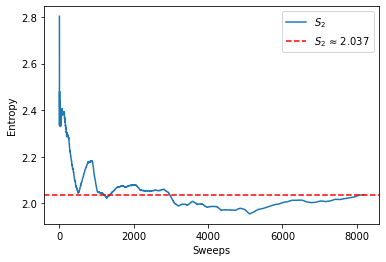

In [29]:
plot_etgent_conv("./attr_data/3x3/sym/processed/EtgEnt_LA3_U-2.0_beta50.0.jld", filling=12)

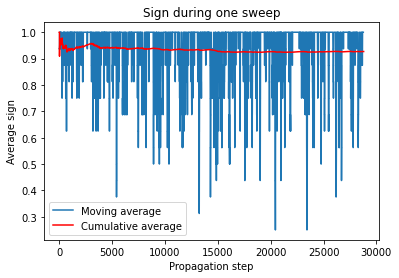

In [6]:
file = h5py.File("./data/test/PropSgn_LA8_N24_U14.0_beta18.0_seed1234.jld")

def real(x):
    return x[0]

def moving_avg(arr, window):
    result = np.zeros(len(arr) - window)
    for i in range(len(arr) - window):
        result[i] = np.average(arr[i:i+window])

    return result

real = np.vectorize(real)

signs = real(np.array(file["Sgn"]))
cumulative_sign = np.cumsum(signs) / (np.arange(len(signs))+1)
moving_sign = moving_avg(signs, 32)

plt.figure(facecolor='white')
plt.plot(moving_sign, label="Moving average")
plt.plot(cumulative_sign, label="Cumulative average", color='r')
plt.ylabel("Average sign")
plt.xlabel("Propagation step")
plt.legend()
plt.title("Sign during one sweep")
plt.show()

<Figure size 432x288 with 0 Axes>

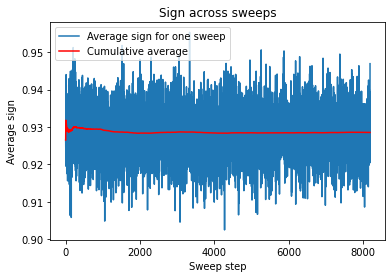

<Figure size 432x288 with 0 Axes>

In [31]:
file = h5py.File("./data/test/SweepSgn_LA8_N24_U14.0_beta18.0_seed1234.jld")

def real(x):
    return x[0]

real = np.vectorize(real)

signs = np.array(file["Sgn"])
cumulative_sign = np.cumsum(signs) / (np.arange(len(signs))+1)
plt.figure(facecolor='white')
plt.plot(signs, label="Average sign for one sweep")
plt.plot(cumulative_sign, label="Cumulative average", color='r')
plt.ylabel("Average sign")
plt.xlabel("Sweep step")
plt.legend()
plt.title("Sign across sweeps")
plt.figure(facecolor='white')

In [12]:
def plot_pq2_conv(Pq2_path, filling):
    file = h5py.File(Pq2_path)
    filling_index = -1
    for (i, ref) in enumerate(list(file["filling"])):
        if str(filling) == str(np.array(file[ref])):
            filling_index = i
            break
    if filling_index == -1:
        raise Exception("Filling not found")

    ref_n = file["En_conv"][filling_index]
    ref_m = file["Em_conv"][filling_index]
    conv_En = np.array(file[ref_n])
    conv_Em = np.array(file[ref_m])

    plt.plot(conv_En, label="$En$", color='blue')
    plt.plot(conv_Em, label="$Em$", color='orange')
    plt.axhline(y = conv_En[-1], color='blue', linestyle = "dashed", label="En ≈ {:.3f}".format(conv_En[-1]))
    plt.axhline(y = conv_Em[-1], color='orange', linestyle = "dashed", label="Em ≈ {:.3f}".format(conv_Em[-1]))
    plt.xlabel("Sweeps")
    plt.ylabel("Expected observable")
    plt.legend()
    plt.title("$filling={}$".format(filling))

[2.78113413e-04 4.88184423e-04 9.98467216e-01 4.88377396e-04
 2.78109100e-04]


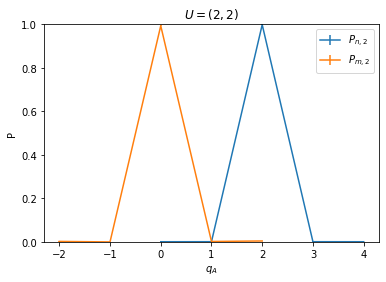

In [ ]:
plot_distribution("./data/2x2/processed/Pq2_LA2_U2.0_beta18.0.jld", (2, 2))

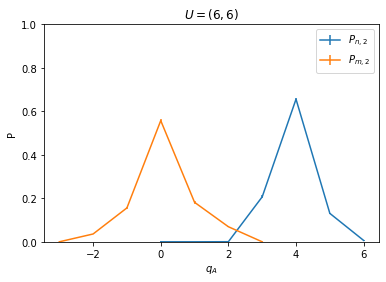

In [14]:
plot_distribution("./data/3x3/processed/Pq2_LA3_U2.0_beta18.0.jld", (6, 6))